# Live Code 3

Perkenalan 

Nama : Hillidatul Ilmi
Batch : 12

# Dataset Description
- Pada graded challenge ini, data diakses menggunakan bigquery-public-data pada Google Cloud Big Query.
- Buka Google Cloud Platform, masuk ke BigQuery, lalu buka tab bigquery-public-data atau klik link berikut atau link berikut untuk langsung menuju ke tabel.

Berikut adalah syntax yang saya gunakan dalam membuat tabel dari query :

In [ ]:
# Menampilkan Kolom sale_dollars pada tabel iowa_liquor_sale dengan hanya menampilkan 50000 data
SELECT sale_dollars FROM `bigquery-public-data.iowa_liquor_sales.sales` LIMIT 5000

Berdasarkan perintah query yang di jalankan, maka menghasilkan dataset tabel yang memiliki ukuran 5000 baris dengan 1 kolom, yang jika di save result google drive memakan memori 29,3 KB. Berdasarkan data tabel ini akan di analisis untuk Assignment Problems.

# Assignment Problems

Kamu adalah seorang data scientist di salah satu perusahaan penjual Liquor. Ada terdapat 5000 transaksi yang terjadi di satu hari untuk suatu produk. Tim marketing menduga ada suatu keanehan pada data transaksi. Bantu tim marketing untuk memvalidasi dugaan mereka apakah betul ada anomali pada data transaksi.

Clue Untuk mengetahui adanya anomali, kamu bisa menggunakan metode extreme value analysis. Untuk melakukan pengecekan anomali/outlier, lakukan langkah-langkah di bawah ini:

**Nomor 1** : Lakukan perhitungan central tendency (mean, median, modus) terhadap data sebelum dideteksi adanya anomali. [Menjawab Rubrik 1b]

In [68]:
#Library untuk memangil data
import pandas as pd
import numpy as np

#Menampilkan data tabel iowa_liquor_sale untuk dianalisis
data = pd.read_csv('/content/h8dsft_P0LC3_HillidatulIlmi.csv')
data

,sale_dollars
0,528.96
1,23.16
2,833.40
3,1057.32
4,7.26
...,...
4995,24.36
4996,309.60
4997,517.20
4998,13.24


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sale_dollars  5000 non-null   float64
dtypes: float64(1)
memory usage: 39.2 KB


In [70]:
data.isnull().sum()

sale_dollars    0
dtype: int64

Berdasarkan perintah data.info tidak ada data missing value, sehingga bisa di gunakan untuk analisi problem selanjutnya.

In [71]:
print('---Central Tendecy sale_dollars---')
print ('Min: ' + str(data['sale_dollars'].min()))
print ('Max: ' + str(data['sale_dollars'].max()))
print ('Mode: ' + str(data['sale_dollars'].mode()[0]))
print ('Median: ' + str(data['sale_dollars'].median()))
print ('Mean: ' + str(data['sale_dollars'].mean()))
print ('S.dev: ' + str(data['sale_dollars'].std()))

---Central Tendecy sale_dollars---
Min: 2.94
Max: 43787.52
Mode: 45.72
Median: 136.33499999999998
Mean: 622.7707579999994
S.dev: 1561.924110437358


Interpretasi Statistika Deskriptif :

Rata-rata transaksi anomali yang terjadi dalam sehari sebesar 622 dengan nilai tengah sebesar 136, nilai rata-rata dan nilai tengah saling berjauhan, hal ini menandakan bahwa transaksi anomali tidak berada dalam distribusi normal. Transaksi anomali yang sering terjadi atau modus sebesar 46. Transaksi anomali yang terjadi paling sedikit/terendah adalah 3 dan paling banyak/tertinggi adalah 43787. Anomali memiliki nilai standar deviasi sebesar 1562, yang berarti sebaran sampel data jauh dari rata-rata nilai sampel itu sendiri atau 1562 data outlier.

**Nomor 2** : Cek skewness data untuk mengetahui apakah data terdistribusi normal atau tidak. [Menjawab Rubrik 1c]

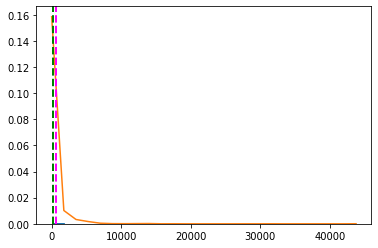

In [72]:
# Visualization of Distribution
Distribusi = data['sale_dollars']
density = stats.gaussian_kde(Distribusi)
n, x, _ = plt.hist(Distribusi, histtype='step', bins=25, density = True)  
plt.plot(x, density(x)*2**7.5)
plt.axvline(Distribusi.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(Distribusi.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

sale_dollars skewness: 10.115263815152225
sale_dollars kurtosis: 185.7619947240576


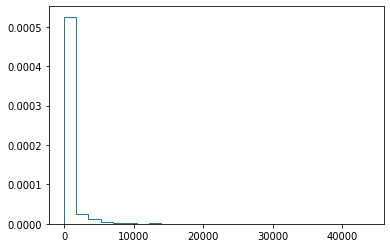

In [73]:
# Dapatkan Nilai Skewness dan Kurtosis

%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats

kemiringan = ['sale_dollars']
for col in kemiringan:
    print(data[col].name + ' skewness: ' + str(data[col].skew()))
    print(data[col].name + ' kurtosis: ' + str(data[col].kurt()))
    n, x, _ = plt.hist(data[col], histtype='step', bins=25, density = True)
    plt.show()
    print('\n')

skewness menadi patokan ukuran asismetris dalam distribusi probabilty normal. Berdasarkan visualisasi nilai sale_dollars, bahwa nilai skewness sebesar 10 atau tidak berada di rentang rasio skewness -2 sampai 2. Sehingga dapat di artikan bawah sale_dollars tidak berdistribusi normal. 

**Nomor 3** : Lakukan pengolahan data dengan menggunakan extreme value analysis. [Menjawab Rubrik 1d]

{'boxes': [<matplotlib.lines.Line2D at 0x7fa382a18590>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa382a188d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa382a1b890>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa382a23090>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa382a18ad0>,
  <matplotlib.lines.Line2D at 0x7fa382a028d0>]}

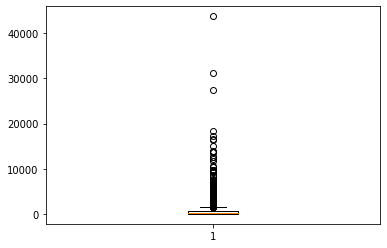

In [94]:
plt.boxplot(data['sale_dollars'])

In [95]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
IQR

sale_dollars    563.240000
Z-Score           0.360643
dtype: float64

Berdasarkan proses pengecekan nilai extreme value di ketahui bahwa terdapat 563 data outlier, atau menjauh dari nilai sampel rata-rata nya. Maka akan dilakukan pembersihan nilai Outlier.

In [96]:
da = data[~(((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))))]
da

,sale_dollars,Z-Score
0,528.96,-0.060067
1,23.16,-0.383931
2,833.40,0.134866
3,1057.32,0.278242
4,7.26,-0.394112
...,...,...
4995,24.36,-0.383162
4996,309.60,-0.200523
4997,517.20,-0.067597
4998,13.24,-0.390283


In [97]:
Q1 = da.quantile(0.25)
Q3 = da.quantile(0.75)
IQR = Q3-Q1
IQR

sale_dollars    397.420000
Z-Score           0.254468
dtype: float64

Berdasarkan pembersihan data outlier di peroleh jumlahnya menjadi 397. Data outlier belum hilang sepenuhnya tetapi data outliernya berkurang dari sebelumnya.

In [111]:
print('---Central Tendecy sale_dollars dikurangi data outlier nya---')
print ('Min: ' + str(da['sale_dollars'].min()))
print ('Max: ' + str(da['sale_dollars'].max()))
print ('Mode: ' + str(da['sale_dollars'].mode()[0]))
print ('Median: ' + str(da['sale_dollars'].median()))
print ('Mean: ' + str(da['sale_dollars'].mean()))
print ('S.dev: ' + str(da['sale_dollars'].std()))

---Central Tendecy sale_dollars dikurangi data outlier nya---
Min: 2.94
Max: 1440.0
Mode: 45.72
Median: 99.72
Mean: 270.4851994651185
S.dev: 329.21662938980603


**Nomor 4** : Buat variabel baru yang menyimpan data yang sudah dibuang data anomalinya.

In [98]:
data_baru = da
data_baru 

,sale_dollars,Z-Score
0,528.96,-0.060067
1,23.16,-0.383931
2,833.40,0.134866
3,1057.32,0.278242
4,7.26,-0.394112
...,...,...
4995,24.36,-0.383162
4996,309.60,-0.200523
4997,517.20,-0.067597
4998,13.24,-0.390283


In [99]:
data_lama = data
data_lama

,sale_dollars,Z-Score
0,528.96,-0.060067
1,23.16,-0.383931
2,833.40,0.134866
3,1057.32,0.278242
4,7.26,-0.394112
...,...,...
4995,24.36,-0.383162
4996,309.60,-0.200523
4997,517.20,-0.067597
4998,13.24,-0.390283


**Nomor 5** : Analisis signifikansi perbedaan data sebelum dibuang outliernya dengan sesudah menggunakan hipotesis testing single sample. (Anggap data awal merupakan data populasi dan data baru merupakan sample). Definisikan pula hipotesis null dan alternatifnya. [Menjawab Rubrik 1e]

Uji t yang digunakan adalah paired test atau A/B test

In [100]:
A = data_baru.sale_dollars.sum()/data_baru.sale_dollars.count()
B = data_lama.sale_dollars.sum()/data_baru.sale_dollars.count()

In [101]:
print('Transaksi Anomali data baru/tidak outlier version:', A)
print('Transaksi Anomali data lama/outlier version:', B)

Transaksi Anomali data baru/tidak outlier version: 270.4851994651214
Transaksi Anomali data lama/outlier version: 693.972317806998


In [102]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
t_stat,p_val = stats.ttest_rel(A,B)
print('P-value:',p_val)

P-value: nan


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3724: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1. Berapa rata-rata, median, dan modus dari data tersebut sebelum dihilangkan outliernya? Bagaimana kecerendungan pemusatan datanya? jelaskan jawabanmu![Menjawab Rubrik 2a]

Jawab : 

---Central Tendecy sale_dollars---

Min: 2.94, Max: 43787.52, Mode: 45.72, Median: 136.33499999999998, Mean: 622, 7707579999994, S.dev: 1561.924110437358

Pemusatan data untuk sale dollors memiliki nilai modus, median dan mean masih berjauhan, bisa di artikan data tidak berdistrbusi normal. Dimana jumlah nilai outlier yang menjauhi rata-rata sebanyak 1562 data. Sehingga skewness nya cendrung ke sebebelah kiri dan kurtosis akan membentuk garis denity lurus ke atas.

---
---Central Tendecy sale_dollars dikurangi data outlier nya---

Min: 2.94, Max: 1440.0, Mode: 45.72, Median: 99.72, Mean: 270.4851994651185, S.dev: 329.21662938980603

Pemusatan data untuk sale dollors dikurangi data outlier memiliki nilai modus, median dan mean masih berjauhan, bisa di artikan data tidak berdistrbusi normal. Dimana jumlah nilai outlier yang menjauhi rata-rata sebanyak329 data atau nilainya lebih kecil dari sebelumnya. Sehingga skewness nya  tetap cendrung ke sebebelah kiri dan kurtosis akan membentuk garis denity lurus ke atas.

2. Sebelum melakukan extreme value analysis, kamu harus melakukan pengecekan skewness dari distribusi datanya. Apakah datanya skew atau normal? jelaskan jawabanmu![Menjawab Rubrik 2b]

Jawab : Visualisasi skewness dengan rata asli membentuk susunan histogram yang lurus dan tidak sejajar dengan median maupun rata-rata, garis density juga menghasilkan gambar yang tidak membentuk lonceng melengkung distribusi normal pada umumnya. Nilai sale_dollars skewness sebesar 10.115263815152225, dimana nilai ini jauh dari standar rasio skewnes -2 sampai 2. Sehingga data asli transisi anomali tidak berdistribusi normal.


3. Ada dua teknik untuk melakukan extreme value analysis, teknik yang mana yang kamu pakai? berikan alasanmu berdasarkan data![Menjawab Rubrik 2c]

Jawab : Untuk mendeteksi extream value atau oulier, saya menggunakan metode Tukey's Rule for outlier detection. Berdasarkan data yang saya peroleh niali awal IQR nya sebesar 563, setelah dilakukan pembersihan data outlier nilai IQR nya menjadi 397. Walaupun setelah penghilangan data oulier belum bernilai nol, tetapi niai IQR sebelum pembersihan dan sesudah pembersihan nilainya menjadi lebih berkurang.

4. Ada berapa banyak data yang merupakan outlier? apakah cukup signifikan jumlahnya? (anggap bahwa jumlah signifikan lebih dari 50%). Jelaskan jawabanmu![Menjawab Rubrik 2d]

Jawab :  Berdasarkan nilai standar deviasi yang merupakan nilai jumlah atau banyaknya data yang menjauhi nilai rata-rata pada data asli berjumlah 1562 data outlier. Jika dibandingkan dengan banyaknya nya baris pada kolom score_dollar berjumlah 5000, bisa di katakan bahwa data oulier cukup signifikan mempengaruhi hasil nilai score_dollar atau transaksi anomali.

5. Setelah kamu menyingkirkan outlier dari data dan melakukan uji hipotesis, apakah ada perbedaan yang signifikan? jelaskan jawabanmu![Menjawab Rubrik 2e]

Jawab : Berdasarkan Hasil nilai Paired ttest di peroleh bahwa, data asli dan data tidak oulier memiliki perbedaan yang signifikan. Dimana transaksi anomali produk data asli berbeda atau tidak sama dengan transaksi anomai data tidak outlier.